<a href="https://colab.research.google.com/github/Kartavya-Jharwal/Kartavya_Business_Analytics2025/blob/main/Class_Assignments/week11/Week_11_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 11 Session 1: Multiple Regression Analysis

## Problem Statement

A distributor of frozen dessert pies wants to evaluate factors thought to influence demand.

**Variables:**
- **Dependent Variable:** Pie Sales (units per week)
- **Independent Variables:** Advertising ($100)

## Hypotheses

**Null Hypothesis (H₀):** β₁ = β₂ = 0 (No significant relationship between independent variables and pie sales)

**Alternative Hypothesis (H₁):** At least one βᵢ ≠ 0 (At least one independent variable has a significant relationship with pie sales)

**Significance Level:** α = 0.05  
**Confidence Interval:** 95%

## Analysis Plan

1. **Data Loading and Inspection**
2. **Exploratory Data Analysis (EDA)** - Visualizations and descriptive statistics
3. **Correlation Analysis** - Correlation matrix and heatmap
4. **Multicollinearity Check** - VIF (Variance Inflation Factor) analysis
5. **Multiple Regression Model**
6. **F-test** - Overall model significance
7. **T-tests** - Individual predictor significance

# Import Required Libraries

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1: Load Data

In [6]:
# Load data from GitHub
url = 'https://github.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/raw/main/Class_Assignments/week11/Pie%20Sale.xlsx'
df = pd.read_excel(url)

print("Data loaded successfully!")
print(df.shape)

Data loaded successfully!
(15, 4)


## Step 2: Initial Data Inspection

In [7]:
# Display first few rows
print("First 5 rows:")
print(df.head())

print("\nDataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows:
   Week  Pie Sales  Price ($)  Advertising ($100s)
0     1        350        5.5                  3.3
1     2        460        7.5                  3.3
2     3        350        8.0                  3.0
3     4        430        8.0                  4.5
4     5        350        6.8                  3.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Week                 15 non-null     int64  
 1   Pie Sales            15 non-null     int64  
 2   Price ($)            15 non-null     float64
 3   Advertising ($100s)  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 612.0 bytes

Descriptive Statistics:
            Week   Pie Sales  Price ($)  Advertising ($100s)
count  15.000000   15.000000  15.000000             15.00000
mean    8.000000  399.333333   6.613333              3

## Step 3: Exploratory Data Analysis (EDA)

### Scatterplots: Independent Variables vs Dependent Variable

KeyError: 'Pie_Sales'

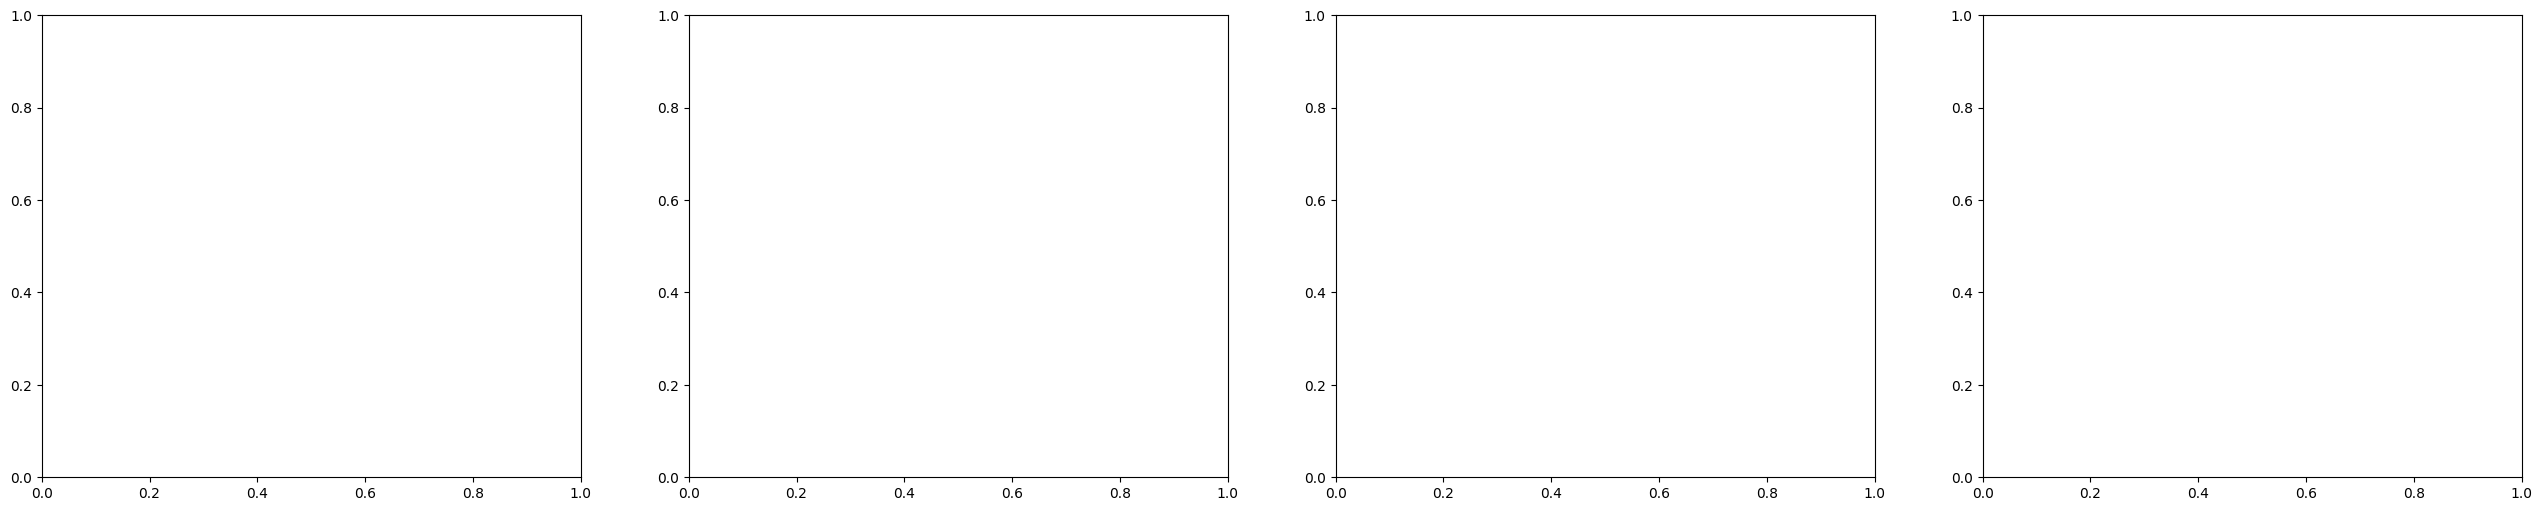

In [8]:
# Get independent and dependent variable names
dependent_var = 'Pie_Sales'
independent_vars = [col for col in df.columns if col != dependent_var]

# Create scatterplots for each independent variable against the dependent variable
n_vars = len(independent_vars)
fig, axes = plt.subplots(1, n_vars, figsize=(8*n_vars, 6))

# Handle single variable case
if n_vars == 1:
    axes = [axes]

for i, var in enumerate(independent_vars):
    axes[i].scatter(df[var], df[dependent_var], alpha=0.6, s=100, edgecolors='black')
    axes[i].set_xlabel(f'{var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(f'{dependent_var}', fontsize=12, fontweight='bold')
    axes[i].set_title(f'{dependent_var} vs {var}', fontsize=14, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

    # Set axes to start at 0
    axes[i].set_xlim(left=0)
    axes[i].set_ylim(bottom=0)

    # Add trend line
    z = np.polyfit(df[var], df[dependent_var], 1)
    p = np.poly1d(z)
    axes[i].plot(df[var], p(df[var]), "r--", alpha=0.8, linewidth=2, label='Trend line')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [9]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

print("\nInterpretation:")
print("Values close to 1 = strong positive correlation")
print("Values close to -1 = strong negative correlation")
print("Values close to 0 = weak correlation")

NameError: name 'correlation_matrix' is not defined

<Figure size 800x600 with 0 Axes>

In [10]:
# Calculate VIF
X = df[independent_vars]
X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("VIF Analysis:")
print(vif_data)

print("\nInterpretation:")
for idx, row in vif_data.iterrows():
    if row['Variable'] != 'const':
        if row['VIF'] < 5:
            print(f"{row['Variable']}: VIF = {row['VIF']:.2f} - Low multicollinearity (Good)")
        elif row['VIF'] < 10:
            print(f"{row['Variable']}: VIF = {row['VIF']:.2f} - Moderate multicollinearity")
        else:
            print(f"{row['Variable']}: VIF = {row['VIF']:.2f} - High multicollinearity (Problem)")

VIF Analysis:
              Variable         VIF
0                const  166.658421
1                 Week    1.111281
2            Pie Sales    2.199530
3            Price ($)    1.597665
4  Advertising ($100s)    1.704694

Interpretation:
Week: VIF = 1.11 - Low multicollinearity (Good)
Pie Sales: VIF = 2.20 - Low multicollinearity (Good)
Price ($): VIF = 1.60 - Low multicollinearity (Good)
Advertising ($100s): VIF = 1.70 - Low multicollinearity (Good)


In [11]:
# T-tests for individual variables
print("T-Tests for Each Variable:")

coef_summary = pd.DataFrame({
    'Variable': model.params.index,
    'Coefficient': model.params.values,
    'P-value': model.pvalues.values
})

print(coef_summary)

print("\nInterpretation:")
for idx, row in coef_summary.iterrows():
    var_name = row['Variable']
    if var_name == 'const':
        print(f"\nIntercept: {row['Coefficient']:.2f}")
    else:
        print(f"\n{var_name}:")
        print(f"  Coefficient: {row['Coefficient']:.2f}")
        print(f"  P-value: {row['P-value']:.4f}")

        if row['P-value'] < 0.05:
            print(f"  Result: SIGNIFICANT")
            direction = "increases" if row['Coefficient'] > 0 else "decreases"
            print(f"  Each unit increase in {var_name} {direction} {dependent_var} by {abs(row['Coefficient']):.2f}")
        else:
            print(f"  Result: NOT significant")

T-Tests for Each Variable:


NameError: name 'model' is not defined

In [ ]:
# Summary of key findings
print("="*60)
print("REGRESSION ANALYSIS SUMMARY")
print("="*60)
print(f"\nDependent Variable: {dependent_var}")
print(f"Independent Variable(s): {', '.join(independent_vars)}")
print(f"\nSample Size: {len(df)}")
print(f"\nModel Performance:")
print(f"  R-squared: {model.rsquared:.4f}")
print(f"  Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"  F-statistic: {model.fvalue:.4f}")
print(f"  F-test p-value: {model.f_pvalue:.6f}")

print(f"\n{'='*60}")
print("HYPOTHESIS TESTING RESULTS (α = 0.05):")
print(f"{'='*60}")

# Overall model significance
if model.f_pvalue < 0.05:
    print("\n✓ OVERALL MODEL: SIGNIFICANT")
    print(f"  The regression model is statistically significant (p = {model.f_pvalue:.6f})")
else:
    print("\n✗ OVERALL MODEL: NOT SIGNIFICANT")
    print(f"  The regression model is not statistically significant (p = {model.f_pvalue:.6f})")

# Individual predictors
print(f"\nINDIVIDUAL PREDICTORS:")
for var in independent_vars:
    p_val = model.pvalues[var]
    coef = model.params[var]
    if p_val < 0.05:
        print(f"\n✓ {var}: SIGNIFICANT (p = {p_val:.6f})")
        print(f"  Coefficient: {coef:.4f}")
        direction = "increases" if coef > 0 else "decreases"
        print(f"  Interpretation: Each unit increase in {var} {direction} {dependent_var} by {abs(coef):.4f} units")
    else:
        print(f"\n✗ {var}: NOT SIGNIFICANT (p = {p_val:.6f})")
        print(f"  Coefficient: {coef:.4f}")

print(f"\n{'='*60}")
print("MULTICOLLINEARITY CHECK:")
print(f"{'='*60}")
for idx, row in vif_data.iterrows():
    if row['Variable'] != 'const':
        if row['VIF'] < 5:
            print(f"✓ {row['Variable']}: VIF = {row['VIF']:.3f} (Low multicollinearity)")
        elif row['VIF'] < 10:
            print(f"⚠ {row['Variable']}: VIF = {row['VIF']:.3f} (Moderate multicollinearity)")
        else:
            print(f"✗ {row['Variable']}: VIF = {row['VIF']:.3f} (High multicollinearity)")

print(f"\n{'='*60}")
print("END OF ANALYSIS")
print(f"{'='*60}")

## Summary and Conclusions

In [ ]:
# Get residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Create diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuals vs Fitted Values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.6, edgecolors='black')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Residuals vs Fitted Values', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot (Normal Probability Plot)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Normal Probability Plot)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Scale-Location Plot (Spread-Location Plot)
standardized_residuals = (residuals - residuals.mean()) / residuals.std()
axes[1, 0].scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)), alpha=0.6, edgecolors='black')
axes[1, 0].set_xlabel('Fitted Values', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('√|Standardized Residuals|', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Scale-Location Plot', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histogram of Residuals
axes[1, 1].hist(residuals, bins=10, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Residuals', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Histogram of Residuals', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Diagnostic Plot Interpretations:")
print("="*60)
print("1. Residuals vs Fitted: Should show random scatter around 0")
print("2. Q-Q Plot: Points should follow the diagonal line for normality")
print("3. Scale-Location: Should show random scatter (constant variance)")
print("4. Histogram: Should approximate a normal distribution")

## Step 7: Model Diagnostics

### Residual Analysis

### T-Tests for Individual Predictors

**Purpose:** Test whether each individual independent variable is statistically significant.

**Hypotheses for each predictor:**
- **H₀:** βᵢ = 0 (The variable has no effect on the dependent variable)
- **H₁:** βᵢ ≠ 0 (The variable has a significant effect on the dependent variable)

In [ ]:
# F-test results
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
alpha = 0.05

print("F-Test for Overall Model Significance:")
print("="*60)
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {f_pvalue:.6f}")
print(f"Significance level (α): {alpha}")
print("="*60)

# Interpretation
print("\nInterpretation:")
if f_pvalue < alpha:
    print(f"✓ P-value ({f_pvalue:.6f}) < α ({alpha})")
    print("  REJECT the null hypothesis")
    print("  Conclusion: The overall regression model is statistically significant.")
    print("  At least one independent variable has a significant relationship with the dependent variable.")
else:
    print(f"✗ P-value ({f_pvalue:.6f}) ≥ α ({alpha})")
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: The overall regression model is NOT statistically significant.")

print(f"\nR-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"This means {model.rsquared*100:.2f}% of the variance in {dependent_var} is explained by the model.")

### F-Test for Overall Model Significance

**Purpose:** Test whether the overall regression model is statistically significant.

**Hypotheses:**
- **H₀:** β₁ = β₂ = ... = 0 (The model has no explanatory power)
- **H₁:** At least one βᵢ ≠ 0 (The model has explanatory power)

In [ ]:
# Prepare the data for regression
X = df[independent_vars]
y = df[dependent_var]

# Add constant (intercept) to the model
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Display the regression results
print(model.summary())
print("\n" + "="*60 + "\n")

## Step 6: Multiple Regression Analysis

### Building the Regression Model

## Step 5: Multicollinearity Check - VIF Analysis

**Variance Inflation Factor (VIF)** measures how much the variance of a regression coefficient is inflated due to multicollinearity.

**Interpretation:**
- VIF = 1: No correlation
- VIF < 5: Low multicollinearity (acceptable)
- VIF 5-10: Moderate multicollinearity (caution)
- VIF > 10: High multicollinearity (problematic)

### Correlation Heatmap

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)
print("\n" + "="*60 + "\n")

## Step 4: Correlation Analysis

### Correlation Matrix